In [2]:
#Render Matplotlib Plots Inline
%matplotlib inline

#Import the standard Python Scientific Libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

#Suppress Deprecation and Incorrect Usage Warnings 
import warnings
warnings.filterwarnings('ignore')

In [17]:
question = pd.read_csv('data/schema.csv')
question.shape

(290, 3)

In [4]:
mcq = pd.read_csv('data/multipleChoiceResponses.csv', encoding="ISO-8859-1", low_memory=False)
mcq.shape

(16716, 228)

<AxesSubplot:xlabel='count', ylabel='LanguageRecommendationSelect'>

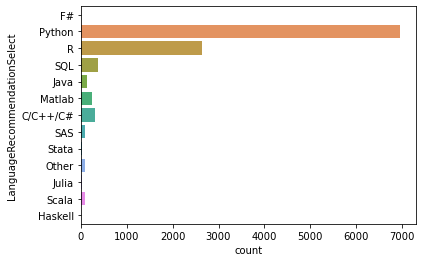

In [5]:
sns.countplot(y='LanguageRecommendationSelect', data=mcq)

<AxesSubplot:xlabel='count', ylabel='CurrentJobTitleSelect'>

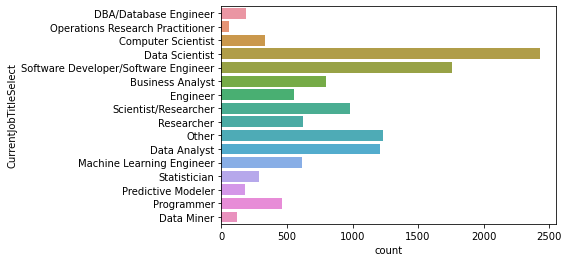

In [7]:
# 현재 하는 일
sns.countplot(y=mcq['CurrentJobTitleSelect'])


In [9]:
# 현재 하는 일에 대한 전체 응답 수
mcq[mcq['CurrentJobTitleSelect'].notnull()]['CurrentJobTitleSelect'].shape

(11830,)

(7158, 228)


<AxesSubplot:xlabel='count', ylabel='CurrentJobTitleSelect'>

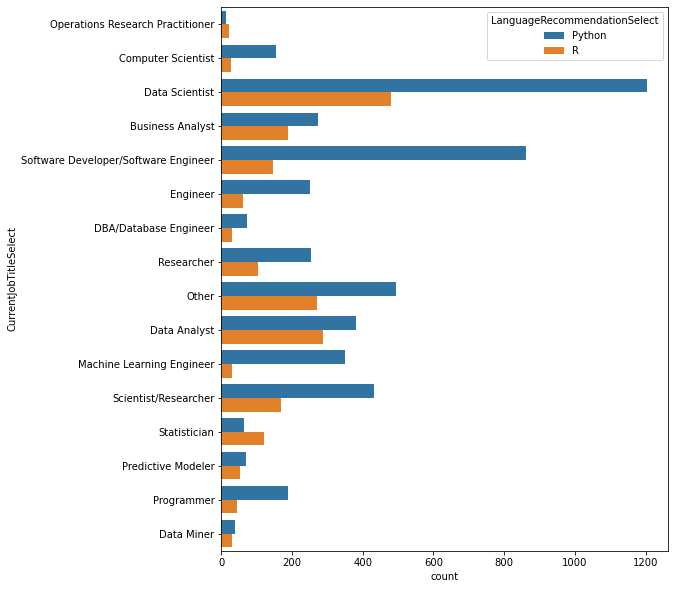

In [10]:
# 현재 하는 일에 대해 응답을 해준 사람 중 Python과 R을 사용하는 사람
# 응답자들이 실제 업무에서 어떤 언어를 주로 사용하는지 볼 수 있다.
data = mcq[(mcq['CurrentJobTitleSelect'].notnull()) & (
 (mcq['LanguageRecommendationSelect'] == 'Python') | (
 mcq['LanguageRecommendationSelect'] == 'R'))]
print(data.shape)
plt.figure(figsize=(8, 10))
sns.countplot(y='CurrentJobTitleSelect',
 hue='LanguageRecommendationSelect',
 data=data)

In [11]:
mcq_ml_tool_count = pd.DataFrame(
 mcq['MLToolNextYearSelect'].value_counts())
mcq_ml_tool_percent = pd.DataFrame(
 mcq['MLToolNextYearSelect'].value_counts(normalize=True))
mcq_ml_tool_df = mcq_ml_tool_count.merge(
 mcq_ml_tool_percent,
 left_index=True,
 right_index=True).head(20)
mcq_ml_tool_df.columns = ['응답 수', '비율']
mcq_ml_tool_df

,응답 수,비율
TensorFlow,2621,0.238316
Python,1713,0.155756
R,910,0.082742
Spark / MLlib,755,0.068649
Hadoop/Hive/Pig,417,0.037916
Other,407,0.037007
Amazon Machine Learning,392,0.035643
Jupyter notebooks,358,0.032551
I don't plan on learning a new tool/technology,341,0.031006
Google Cloud Compute,296,0.026914


<AxesSubplot:xlabel='MLToolNextYearSelect'>

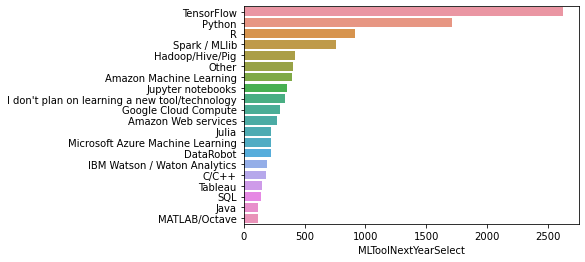

In [12]:
data = mcq['MLToolNextYearSelect'].value_counts().head(20)
sns.barplot(y=data.index, x=data)

In [13]:
mcq['LearningPlatformSelect'] = mcq['LearningPlatformSelect'].astype('str').apply(lambda x: x.split(','))
s = mcq.apply(
 lambda x: pd.Series(x['LearningPlatformSelect']),
 axis=1).stack().reset_index(level=1, drop=True)
s.name = 'platform'

<AxesSubplot:xlabel='platform'>

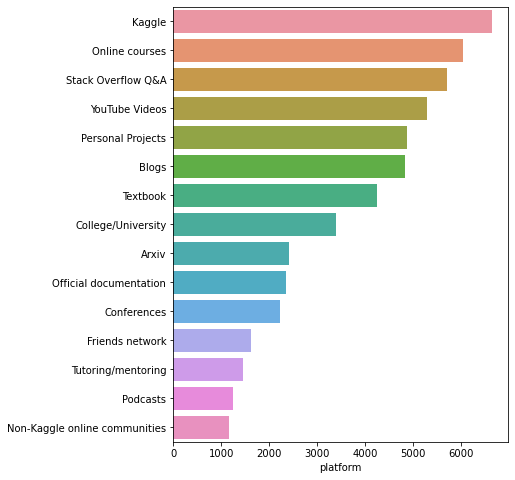

In [14]:
plt.figure(figsize=(6,8))
data = s[s != 'nan'].value_counts().head(15)
sns.barplot(y=data.index, x=data)

In [18]:
# 설문내용과 누구에게 물어봤는지를 찾아봄
qc = question.loc[question[
 'Column'].str.contains('LearningCategory')]
print(qc.shape)
qc

(7, 3)


,Column,Question,Asked
91,LearningCategorySelftTaught,What percentage of your current machine learni...,All
92,LearningCategoryOnlineCourses,What percentage of your current machine learni...,All
93,LearningCategoryWork,What percentage of your current machine learni...,All
94,LearningCategoryUniversity,What percentage of your current machine learni...,All
95,LearningCategoryKaggle,What percentage of your current machine learni...,All
96,LearningCategoryOther,What percentage of your current machine learni...,All
97,LearningCategoryOtherFreeForm,What percentage of your current machine learni...,All


In [19]:
use_features = [x for x in mcq.columns if x.find(
 'LearningPlatformUsefulness') != -1]

<AxesSubplot:>

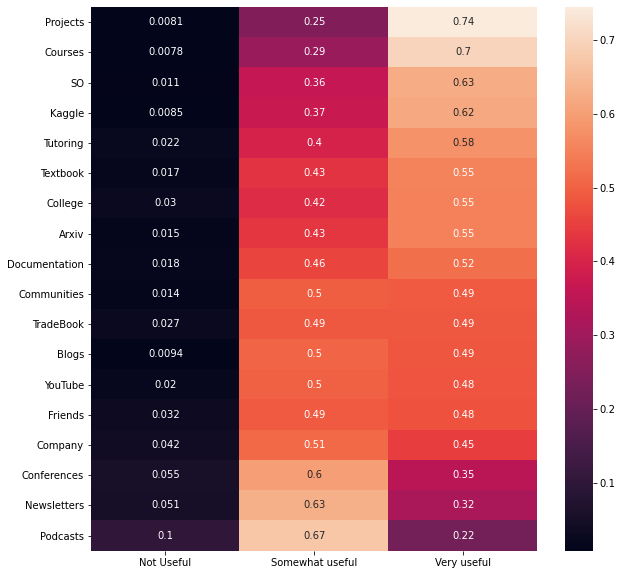

In [20]:
fdf = {}
for feature in use_features:
 a = mcq[feature].value_counts()
 a = a/a.sum()
 fdf[feature[len('LearningPlatformUsefulness'):]] = a

fdf = pd.DataFrame(fdf).transpose().sort_values(
 'Very useful', ascending=False)

# 학습플랫폼들이 얼마나 유용한지에 대한 상관관계를 그려본다.
plt.figure(figsize=(10,10))
sns.heatmap(
 fdf.sort_values(
 "Very useful", ascending=False), annot=True)

<AxesSubplot:title={'center':'Usefullness of Learning Platforms'}>

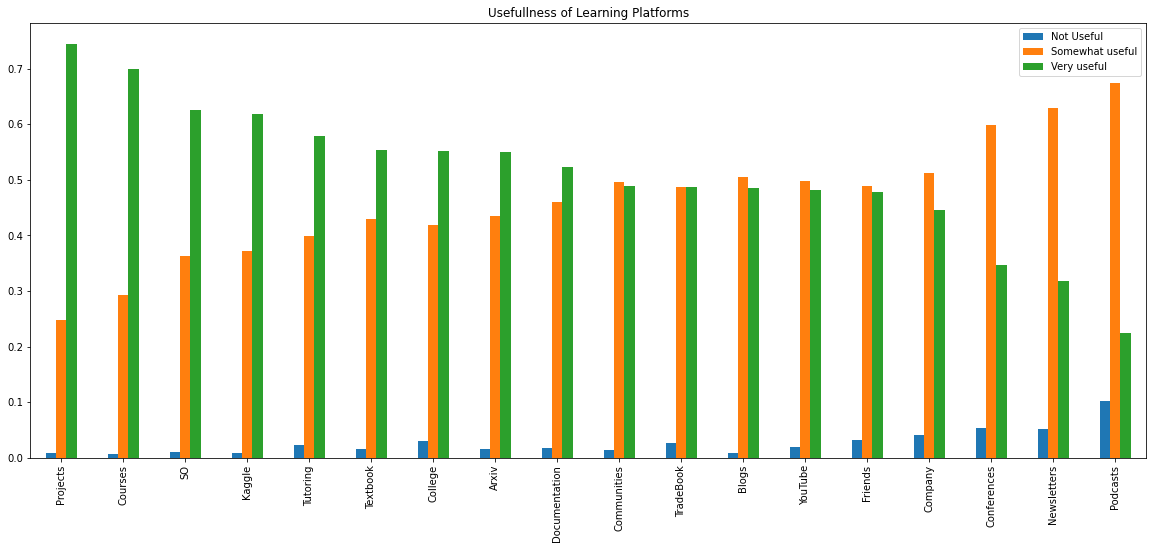

In [21]:
# 유용함의 정도를 플랫폼별로 그룹화해서 본다.
fdf.plot(kind='bar', figsize=(20,8),
 title="Usefullness of Learning Platforms")

In [22]:
cat_features = [x for x in mcq.columns if x.find(
 'LearningCategory') != -1]
cat_features

['LearningCategorySelftTaught',
 'LearningCategoryOnlineCourses',
 'LearningCategoryWork',
 'LearningCategoryUniversity',
 'LearningCategoryKaggle',
 'LearningCategoryOther']

In [23]:
cdf = {}
for feature in cat_features:
 cdf[feature[len('LearningCategory'):]] = mcq[feature].mean()

# 파이 차트를 그리기 위해 평균값을 구해와서 담아준다.
cdf = pd.Series(cdf)
cdf

SelftTaught      33.366771
OnlineCourses    27.375514
Work             15.217593
University       16.988607
Kaggle            5.531434
Other             1.795940
dtype: float64

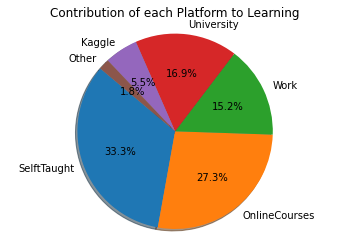

In [24]:
# 학습 플랫폼별 도움이 되는 정도를 그려본다.
plt.pie(cdf, labels=cdf.index,
 autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Contribution of each Platform to Learning")
plt.show()

In [25]:
# 설문내용과 누구에게 물어봤는지를 찾아봄
qc = question.loc[question[
 'Column'].str.contains('HardwarePersonalProjectsSelect')]
print(qc.shape)
qc

(1, 3)


,Column,Question,Asked
74,HardwarePersonalProjectsSelect,Which computing hardware do you use for your p...,Learners


In [26]:
mcq[mcq['HardwarePersonalProjectsSelect'].notnull()][
 'HardwarePersonalProjectsSelect'].shape

(4206,)

In [27]:
mcq['HardwarePersonalProjectsSelect'
 ] = mcq['HardwarePersonalProjectsSelect'
 ].astype('str').apply(lambda x: x.split(','))
s = mcq.apply(lambda x:
 pd.Series(x['HardwarePersonalProjectsSelect']),
 axis=1).stack().reset_index(level=1, drop=True)
s.name = 'hardware'
s = s[s != 'nan']


In [28]:
pd.DataFrame(s.value_counts())


,hardware
Basic laptop (Macbook),2246
GCE ...),669
Laptop + Cloud service (AWS,669
Azure,669
Gaming Laptop (Laptop + CUDA capable GPU),641
Traditional Workstation,527
Laptop or Workstation and local IT supported servers,445
GPU accelerated Workstation,416
Workstation + Cloud service,174
Other,147


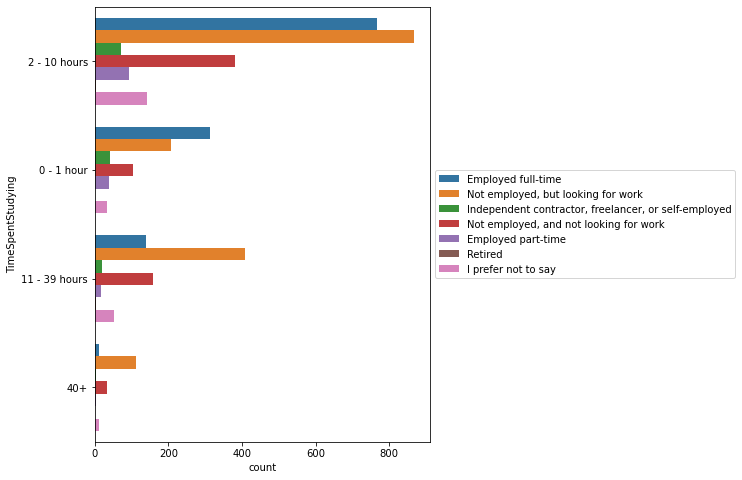

In [29]:
plt.figure(figsize=(6, 8))
sns.countplot(y='TimeSpentStudying',
 data=mcq,
 hue='EmploymentStatus'
 ).legend(loc='center left',
 bbox_to_anchor=(1, 0.5))

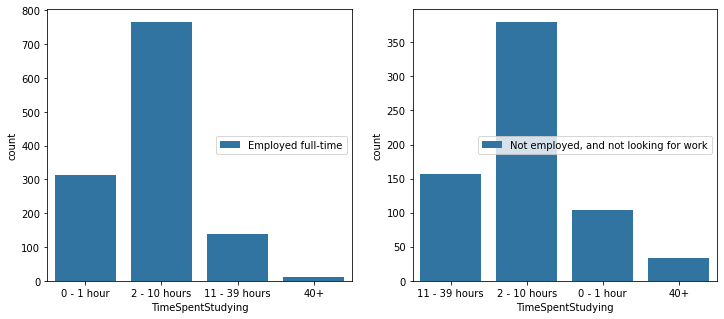

In [34]:
figure, (ax1, ax2) = plt.subplots(ncols=2)
 
fulltime = mcq[(mcq['EmploymentStatus'] == 'Employed full-time')]
lookingfor_job = mcq[(mcq['EmploymentStatus'] == 'Not employed, and not looking for work')]

figure.set_size_inches(12,5)
sns.countplot(x='TimeSpentStudying', data=fulltime, hue='EmploymentStatus', ax=ax1).legend(loc='center right',bbox_to_anchor=(1, 0.5))
sns.countplot(x='TimeSpentStudying', data=lookingfor_job,hue='EmploymentStatus', ax=ax2).legend(loc='center right',bbox_to_anchor=(1, 0.5))

In [36]:
mcq['CompensationAmount'] = mcq[
 'CompensationAmount'].str.replace(',','')
mcq['CompensationAmount'] = mcq[
 'CompensationAmount'].str.replace('-','')

# 환율계산을 위한 정보 가져오기
rates = pd.read_csv('data/conversionRates.csv')
rates.drop('Unnamed: 0',axis=1,inplace=True)

salary = mcq[
 ['CompensationAmount','CompensationCurrency',
 'GenderSelect',
 'Country',
 'CurrentJobTitleSelect']].dropna()
salary = salary.merge(rates,left_on='CompensationCurrency',
 right_on='originCountry', how='left')
salary['Salary'] = pd.to_numeric(
 salary['CompensationAmount']) * salary['exchangeRate']
salary.head()

,CompensationAmount,CompensationCurrency,GenderSelect,Country,CurrentJobTitleSelect,originCountry,exchangeRate,Salary
0,250000,USD,Male,United States,Operations Research Practitioner,USD,1.000000,250000.0
1,80000,AUD,Female,Australia,Business Analyst,AUD,0.802310,64184.8
2,1200000,RUB,Male,Russia,Software Developer/Software Engineer,RUB,0.017402,20882.4
3,95000,INR,Male,India,Data Scientist,INR,0.015620,1483.9
4,1100000,TWD,Male,Taiwan,Software Developer/Software Engineer,TWD,0.033304,36634.4


In [37]:
print('Maximum Salary is USD $',
 salary['Salary'].dropna().astype(int).max())
print('Minimum Salary is USD $',
 salary['Salary'].dropna().astype(int).min())
print('Median Salary is USD $',
 salary['Salary'].dropna().astype(int).median())

Maximum Salary is USD $ 208999999
Minimum Salary is USD $ -2147483648
Median Salary is USD $ 53812.0


Text(0.5, 1.0, 'Salary Distribution')

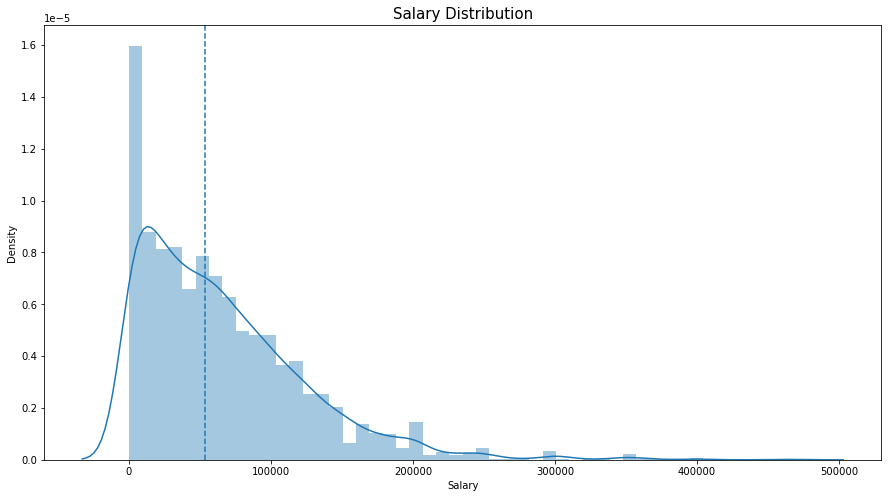

In [41]:
plt.subplots(figsize=(15,8))
salary=salary[salary['Salary']<500000]
sns.distplot(salary['Salary'])
plt.axvline(salary['Salary'].median(), linestyle='dashed')
plt.title('Salary Distribution',size=15)

Text(0.5, 1.0, 'Highest Salary Paying Countries')

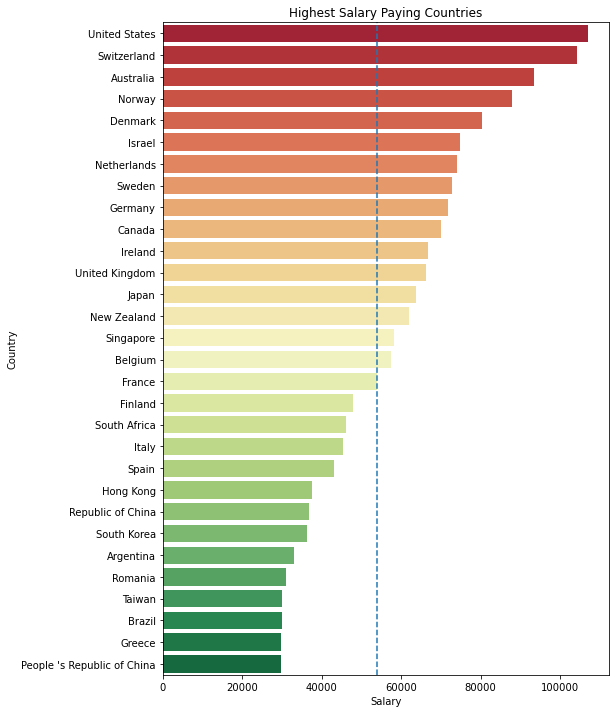

In [42]:
plt.subplots(figsize=(8,12))

sal_coun = salary.groupby(
 'Country')['Salary'].median().sort_values(
 ascending=False)[:30].to_frame()

sns.barplot('Salary',
 sal_coun.index,
 data = sal_coun,
 palette='RdYlGn')

plt.axvline(salary['Salary'].median(), linestyle='dashed')
plt.title('Highest Salary Paying Countries')

<AxesSubplot:xlabel='Salary', ylabel='GenderSelect'>

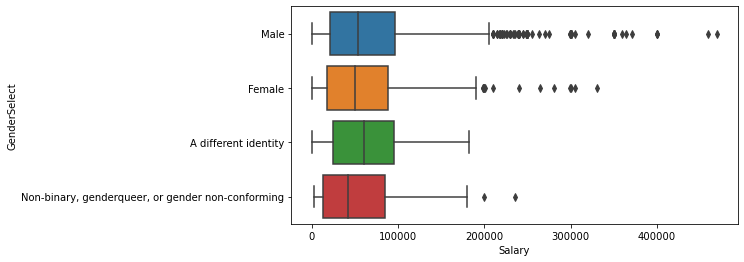

In [43]:
plt.subplots(figsize=(8,4))
sns.boxplot(y='GenderSelect',x='Salary', data=salary)

<AxesSubplot:xlabel='Salary', ylabel='GenderSelect'>

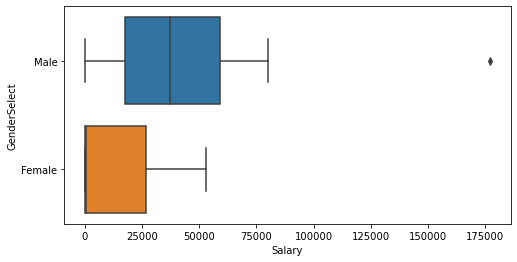

In [44]:
salary_korea = salary.loc[(salary['Country']=='South Korea')]
plt.subplots(figsize=(8,4))
sns.boxplot(y='GenderSelect',x='Salary',data=salary_korea)

In [45]:
salary_korea.shape


(26, 8)

In [46]:
salary_korea[salary_korea['GenderSelect'] == 'Female']


,CompensationAmount,CompensationCurrency,GenderSelect,Country,CurrentJobTitleSelect,originCountry,exchangeRate,Salary
479,30000,KRW,Female,South Korea,Data Analyst,KRW,0.000886,26.58
2903,800000,KRW,Female,South Korea,Researcher,KRW,0.000886,708.80
4063,60000000,KRW,Female,South Korea,Researcher,KRW,0.000886,53160.00
